In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Read data file
df = pd.read_csv('../dataset/cleaned_NEM.csv', index_col='Date')

# PREPROCESSING DATA

In [7]:
# Flip the dataset
df = df.iloc[::-1]

# Reset the index
df = df.reset_index(drop=True)


In [8]:
df

,Adj Close,Close,High,Low,Open,Volume
0,46.000000,46.000000,46.130001,45.669998,45.799999,6789100
1,45.759998,45.759998,45.889999,45.130001,45.389999,8656200
2,45.259998,45.259998,46.009998,45.090000,45.389999,11049000
3,45.439999,45.439999,46.450001,45.180000,46.349998,13809400
4,46.939999,46.939999,47.580002,46.509998,47.439999,11956500
...,...,...,...,...,...,...
1467,28.097637,34.070000,34.080002,33.389999,33.630001,6457200
1468,28.015163,33.970001,34.930000,33.799999,34.669998,4868600
1469,28.353298,34.380001,34.490002,33.279999,33.910000,8622600
1470,28.353298,34.380001,34.869999,34.049999,34.740002,5763200


In [9]:
# Format column Price to float
# List of column names to convert
columns = ['Price', 'Open', 'High', 'Low']

# Iterate over the columns and convert them to float
for column in columns:
    df[column] = df[column].str.replace(',', '').astype(float)
df

KeyError: 'Price'

# SPLITTING DATA(7-2-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

# FIND BEST VALUE FOR K

In [10]:
# Import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

NameError: name 'x_train' is not defined

<Axes: >

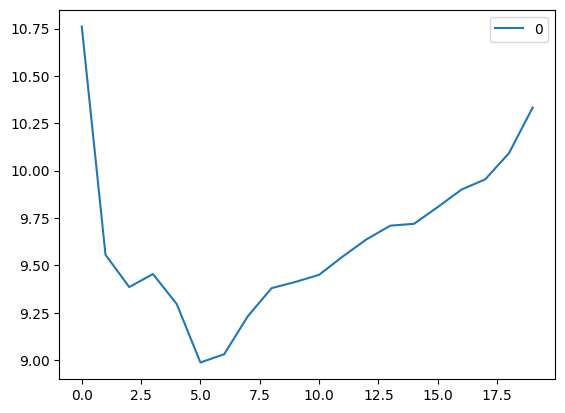

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [12]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

nn = KNeighborsRegressor(params)

model = GridSearchCV(nn, params, cv=10)
model.fit(x_train,y_train)
model.best_params_

NameError: name 'x_train' is not defined

# K-NEAREST NEIGHBOR

In [13]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [14]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

NameError: name 'x_test' is not defined

In [15]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  8.98715391594777
Testing MAE:  7.0062937062936985
Testing MAPE:  0.3888373885140789
Validation RMSE:  9.452539627065041
Validation MAE:  7.08171296296298
Validation MAPE:  0.3669213902489062


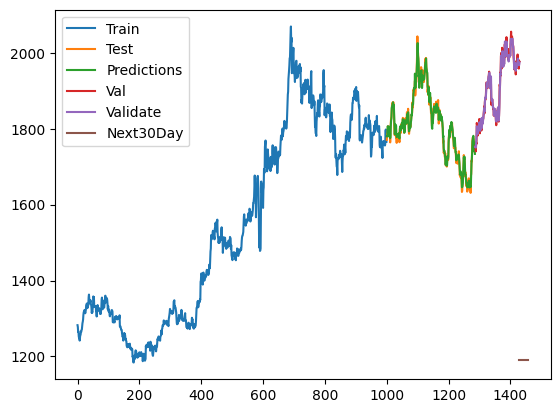

In [ ]:
# Plot the model
plt.plot(train_data.index,train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [ ]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.99


# SPLITTING DATA(6-3-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [ ]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 10.153888469396895
RMSE value for k=  2 is: 9.470419534204716
RMSE value for k=  3 is: 9.395086562408654
RMSE value for k=  4 is: 9.310057192005583
RMSE value for k=  5 is: 9.2091501699748
RMSE value for k=  6 is: 9.09010593447764
RMSE value for k=  7 is: 9.222351691909745
RMSE value for k=  8 is: 9.403116094844494
RMSE value for k=  9 is: 9.462220154264903
RMSE value for k=  10 is: 9.465370967502944
RMSE value for k=  11 is: 9.468068059945665
RMSE value for k=  12 is: 9.484423563890982
RMSE value for k=  13 is: 9.56581539879397
RMSE value for k=  14 is: 9.573193440948463
RMSE value for k=  15 is: 9.715937463391857
RMSE value for k=  16 is: 9.814945401120754
RMSE value for k=  17 is: 10.008307537416728
RMSE value for k=  18 is: 10.110980311576611
RMSE value for k=  19 is: 10.18267270078598
RMSE value for k=  20 is: 10.426735898808271


<Axes: >

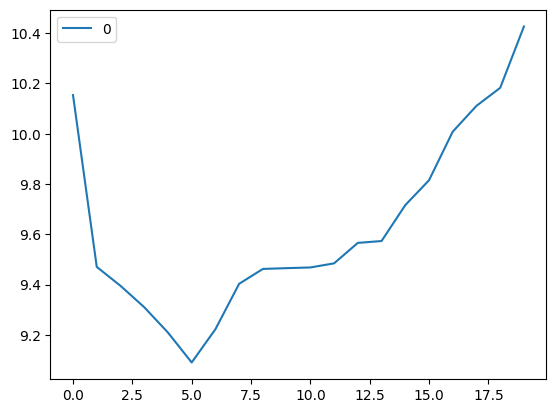

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

nn = KNeighborsRegressor(params)

model = GridSearchCV(nn, params, cv=10)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}

# K-NEAREST NEIGHBOR

In [ ]:
# create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 14)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=14)

In [ ]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [16]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  9.573193440948463
Testing MAE:  7.389826839826857
Testing MAPE:  0.41036147354966535
Validation RMSE:  15.403106864675998
Validation MAE:  11.445504495504476
Validation MAPE:  0.5883930672416737


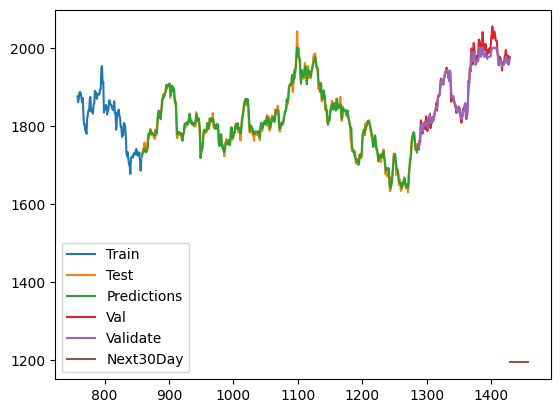

In [ ]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [17]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

NameError: name 'x_test' is not defined

# SPLITTING DATA(5-3-2)

In [18]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [19]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [20]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.4909905095582374
RMSE value for k=  2 is: 3.2625617416533887
RMSE value for k=  3 is: 3.2447562663103953
RMSE value for k=  4 is: 3.1944668849719315
RMSE value for k=  5 is: 3.1383516600005694
RMSE value for k=  6 is: 3.139893604183937
RMSE value for k=  7 is: 3.1036778443373176
RMSE value for k=  8 is: 3.078246919922082
RMSE value for k=  9 is: 3.063767397331959
RMSE value for k=  10 is: 3.0484302476376146
RMSE value for k=  11 is: 3.039172289740449
RMSE value for k=  12 is: 3.038670825815245
RMSE value for k=  13 is: 3.0301438985154934
RMSE value for k=  14 is: 3.0118626272873894
RMSE value for k=  15 is: 3.006717132985423
RMSE value for k=  16 is: 3.0055995308517125
RMSE value for k=  17 is: 3.001958223199054
RMSE value for k=  18 is: 3.0089189077048903
RMSE value for k=  19 is: 3.0091633995686915
RMSE value for k=  20 is: 3.013904436156495


In [21]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

<Axes: >

# K-NEAREST NEIGHBOR

In [22]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 6)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [23]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [24]:
# Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Close


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  16.350012851001683
Testing MAE:  12.145843045843048
Testing MAPE:  0.6565294245388708
Validation RMSE:  12.251493891118026
Validation MAE:  9.38601398601397
Validation MAPE:  0.5108131186315716


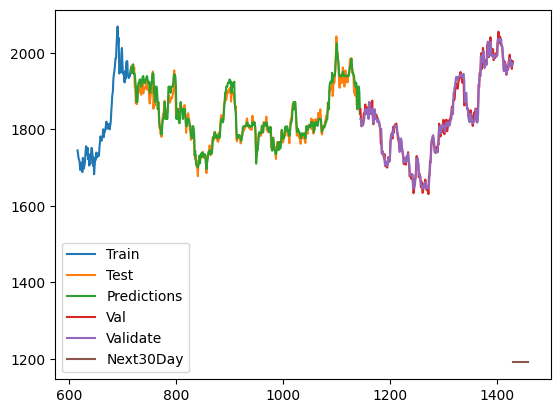

In [ ]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [ ]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.94


# Evaluating model

---

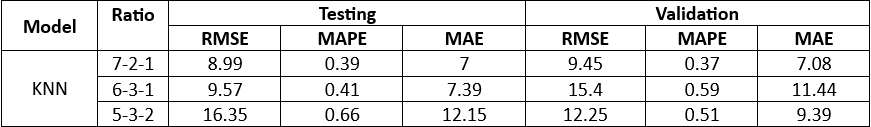